<a href="https://colab.research.google.com/github/toruuno/DNN_d3d4/blob/master/4_3_keras_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_3_4')
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_3_4/common')
sys.path.append('/content/drive/My Drive/DNN_code_colab_lesson_3_4/lesson4')

In [3]:
#!pip install tensorflow==2.6.0
#!pip install tensorflow==1.9.0
#!pip install tensorflow==1.15.5

#おまじない(このコードはtf1.9.0っぽいけどつじつま合わせる為には以下を打てばよいらしい)
#ただし1.15.2までしか戻れない様で・・・残念ながら一部コードのErrorが解決せず
#とりあえず諦めて実行可能なコードだけ実行させる(解決方法がわかれば適宜解決している)
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
import tensorflow as tf

print(tf.__version__)

1.15.2


# keras

## 線形回帰

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


Generation: 10. 誤差 = 2.999926
Generation: 20. 誤差 = 2.0469923
Generation: 30. 誤差 = 1.4053259
Generation: 40. 誤差 = 0.9721565
Generation: 50. 誤差 = 0.67878675
Generation: 60. 誤差 = 0.47927722
Generation: 70. 誤差 = 0.34289104
Generation: 80. 誤差 = 0.24904996
Generation: 90. 誤差 = 0.18396498
Generation: 100. 誤差 = 0.13838562
Generation: 110. 誤差 = 0.1060974
Generation: 120. 誤差 = 0.082917444
Generation: 130. 誤差 = 0.06602337
Generation: 140. 誤差 = 0.053505305
Generation: 150. 誤差 = 0.044065267
Generation: 160. 誤差 = 0.03681705
Generation: 170. 誤差 = 0.031151647
Generation: 180. 誤差 = 0.026647434
Generation: 190. 誤差 = 0.02300968
Generation: 200. 誤差 = 0.020030092
Generation: 210. 誤差 = 0.017559566
Generation: 220. 誤差 = 0.015489722
Generation: 230. 誤差 = 0.013740537
Generation: 240. 誤差 = 0.01225184
Generation: 250. 誤差 = 0.010977622
Generation: 260. 誤差 = 0.009882014
Generation: 270. 誤差 = 0.008936621
Generation: 280. 誤差 = 0.008118552
Generation: 290. 誤差 = 0.007409108
Generation: 300. 誤差 = 0.006792827
Generation

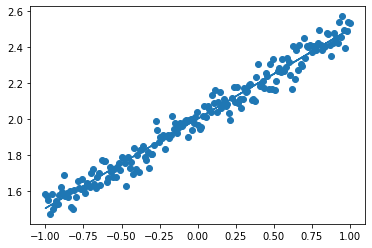

In [5]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, units=1))
# model.add(Dense(input_dim=1, output_dim=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

## 単純パーセプトロン 
OR回路

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  np.random.seed(0)をnp.random.seed(1)に変更
-  エポック数を100に変更
-  AND回路, XOR回路に変更
-  OR回路にしてバッチサイズを10に変更
-  エポック数を300に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
import tensorflow as tf

def try_0(seed=0,epochs=30,logicMode=0,batch_size=1):
    # logging levelを変更
    tf.logging.set_verbosity(tf.logging.ERROR)

    # モジュール読み込み
    import numpy as np
    from keras.models import Sequential
    from keras.layers import Dense, Activation
    from keras.optimizers import SGD
    
    # 乱数を固定値で初期化
    np.random.seed(seed)

    # シグモイドの単純パーセプトロン作成
    model = Sequential()
    model.add(Dense(input_dim=2, units=1))
    model.add(Activation('sigmoid'))
    model.summary()

    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
    
    # トレーニング用入力 X と正解データ T
    X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
    #T = np.array( [[0], [1], [1], [1]] )
    T = None
    if logicMode==1:
        print("AND")
        T=np.array([[0], [0], [0], [1]])
    elif logicMode==2:
        print("XOR")
        T=np.array([[0], [1], [1], [0]])
    else:
        print("OR")
        T=np.array( [[0], [1], [1], [1]] )

    # トレーニング
    model.fit(X, T, epochs=epochs, batch_size=batch_size)
    
    # トレーニングの入力を流用して実際に分類
    Y = model.predict_classes(X, batch_size=batch_size)

    print("TEST")
    print(Y == T)


In [14]:
#デフォルト状態を出しておく
try_0()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
OR
Epoch 1/30
4/4 [==============================] - 0s 34ms/step - loss: 0.4352
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4204
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4079
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3971
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3876
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3790
Epoch 7/30
4/4 [==============================] - 0s 4ms

In [15]:
#seedの変更
#失敗する
try_0(seed=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
OR
Epoch 1/30
4/4 [==============================] - 0s 35ms/step - loss: 0.4976
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4734
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4528
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4364
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4231
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.4115
Epoch 7/30
4/4 [==============================] - 0s 5ms

In [17]:
#epoch数を100に(相違を見るのでseedも1に)
#ちゃんと収束できている
try_0(seed=1,epochs=100)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
OR
Epoch 1/100
4/4 [==============================] - 0s 39ms/step - loss: 0.4976
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4734
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4528
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4364
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4231
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4115
Epoch 7/100
4/4 [==============================] 

In [18]:
#AND回路に変更
#無理がないのでまぁ収束はする
try_0(logicMode=1)

#XOR回路に変更
#弱そう
try_0(logicMode=2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
AND
Epoch 1/30
4/4 [==============================] - 0s 37ms/step - loss: 0.8084
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7406
Epoch 3/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6849
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 0.6409
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6056
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5781
Epoch 7/30
4/4 [==============================] - 0s 5

In [19]:
#epochsを10に変更(OR回路)
#収束するのにエポック数10は足りないという事になる
try_0(epochs=10)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_11 (Activation)   (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
OR
Epoch 1/10
4/4 [==============================] - 0s 39ms/step - loss: 0.4352
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4204
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4079
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.3971
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.3876
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.3790
Epoch 7/10
4/4 [==============================] - 0s 4m

In [22]:
#epochsを300と1000に変更(XOR回路)
#排他論理和に対してとにかく弱いモデルとわかった
#重みを消すわけにいかない(意味があるので)
#2bitのパーセプトロンの和だけだと確かに難しそう
#1bitだけ立った状態は1にしないといけないけど2bit立ったら0にというのが矛盾
#出力も2bitにして下位桁の状態を出力する様なモデルだと可能かな？
try_0(epochs=300, logicMode=2)
try_0(epochs=1000, logicMode=2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 3         
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
XOR
Epoch 1/300
4/4 [==============================] - 0s 45ms/step - loss: 0.8427
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 0.8205
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8049
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7924
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7822
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7754
Epoch 7/300
4/4 [==============================]

## 分類 (iris)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  中間層の活性関数をsigmoidに変更しよう
-  SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
import tensorflow as tf


def try_1(act=0,opt=0,learning_rate=0.1):
    # logging levelを変更
    tf.logging.set_verbosity(tf.logging.ERROR)

    import matplotlib.pyplot as plt
    from sklearn import datasets
    iris = datasets.load_iris()
    x = iris.data
    d = iris.target

    # from sklearn.cross_validation import train_test_split
    from sklearn.model_selection import train_test_split
    x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

    from keras.models import Sequential
    from keras.layers import Dense, Activation
    from keras.optimizers import SGD

    #モデルの設定
    model = Sequential()
    model.add(Dense(12, input_dim=4))
    if act==0:
        print("ReLU")
        model.add(Activation('relu'))
    else:
        print("sigmoid")
        model.add(Activation('sigmoid'))
    model.add(Dense(3, input_dim=12))
    model.add(Activation('softmax'))
    model.summary()

    if opt == 0:
        print("sgd")
        model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    else:
        print("keras.SGD")
        model.compile(optimizer=SGD(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
    loss = model.evaluate(x_test, d_test, verbose=0)

    #Accuracy

    #なんかkeyエラーだってよ
    #plt.plot(history.history['acc']) 
    #plt.plot(history.history['val_acc'])
    print(history.history.keys())
    plt.plot(history.history['accuracy']) #一応候補からそれらしいのを選択しなおす
    plt.plot(history.history['val_accuracy']) #一応候補からそれらしいのを選択しなおす
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1.0)
    plt.show()


ReLU
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_16 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_17 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
sgd
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 2ms/step - loss: 1.1840 - accuracy: 0.0500 - val_loss: 1.0050 - val_accuracy: 0.3667
Epoch 2/20
120/120 [==============================] - 0s 63

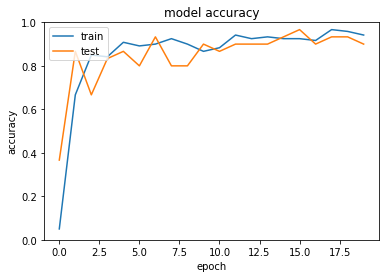

In [27]:
#デフォルト
try_1()

sigmoid
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_18 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_19 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
sgd
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 2ms/step - loss: 1.0964 - accuracy: 0.5000 - val_loss: 1.1286 - val_accuracy: 0.3000
Epoch 2/20
120/120 [==============================] - 0s

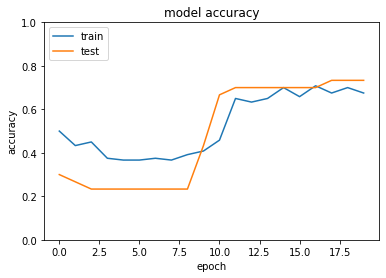

In [28]:
#活性化関数をsigmoidに
#不安定になる
try_1(act=1)

ReLU
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_20 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_21 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
keras.SGD
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 2ms/step - loss: 1.1364 - accuracy: 0.4333 - val_loss: 0.9648 - val_accuracy: 0.3667
Epoch 2/20
120/120 [==============================] -

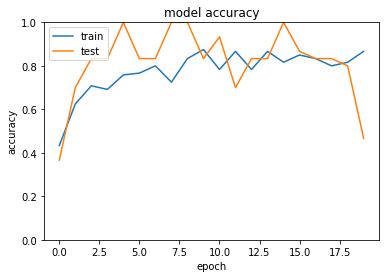

In [29]:
#optimizerをkerasのメソッドに変更
try_1(opt=1)

ReLU
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_26 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_27 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
keras.SGD
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 3ms/step - loss: 1.1391 - accuracy: 0.5083 - val_loss: 0.6203 - val_accuracy: 0.7667
Epoch 2/20
120/120 [==============================] -

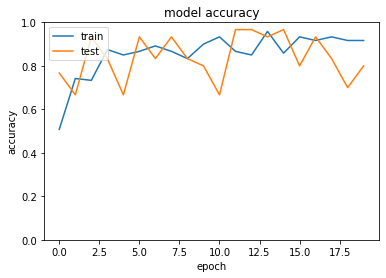

In [33]:
#optimizerをkerasのメソッドに変更(学習率を少し下げる)
#若干安定にはなる
try_1(opt=1,learning_rate=0.05)

## 分類 (mnist)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  load_mnistのone_hot_labelをFalseに変更しよう (error)
-  誤差関数をsparse_categorical_crossentropyに変更しよう
-  Adamの引数の値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

#print(x_train, d_train)
#print(x_test, d_test)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])


#残念ながらError解決せず
#何だかvalueがNoneと言われる(value自体はnumpyか何かのデータ配列を望んでいる様子)
#追いかけても良いけど・・・・tensorflowの世代ミスマッチで廃止されたI/F使っているのか？
#仕方ないのでafterのコードも見てみるが特に注釈もなく
#まぁこれはこのままレポートにしてこのまま提出する事にしましょう(差戻しならば追いかける)
history = model.fit(x=x_train, y=d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

## CNN分類 (mnist)
#### 実行に時間がかかるため割愛

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)


# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

## cifar10
#### 実行に時間がかかるため割愛
データセット cifar10<br>
32x32ピクセルのカラー画像データ<br>
10種のラベル「飛行機、自動車、鳥、猫、鹿、犬、蛙、馬、船、トラック」<br>
トレーニングデータ数:50000, テストデータ数:10000<br>
http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

## RNN

2進数足し算の予測

Keras RNNのドキュメント
https://keras.io/ja/layers/recurrent/#simplernn

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  RNNの出力ノード数を128に変更
-  RNNの出力活性化関数を sigmoid に変更
-  RNNの出力活性化関数を tanh に変更
-  最適化方法をadamに変更
-  RNNの入力 Dropout を0.5に設定
-  RNNの再帰 Dropout を0.3に設定
-  RNNのunrollをTrueに設定

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [38]:
import tensorflow as tf

def try_2(units=16,act="relu",act_l="sigmoid",opt="sgd",
                  dropout=0,
                  recurrent_dropout=0,
                  unroll = False
          ):
    # logging levelを変更
    tf.logging.set_verbosity(tf.logging.ERROR)

    import numpy as np
    import matplotlib.pyplot as plt

    import keras
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout,Activation
    from keras.layers.wrappers import TimeDistributed
    from keras.optimizers import SGD
    from keras.layers.recurrent import SimpleRNN, LSTM, GRU


    # データを用意
    # 2進数の桁数
    binary_dim = 8
    # 最大値 + 1
    largest_number = pow(2, binary_dim)

    # largest_numberまで2進数を用意
    binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2, size=20000)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2, size=20000)
    b_bin = binary[b_int] # binary encoding

    x_int = []
    x_bin = []
    for i in range(10000):
        x_int.append(np.array([a_int[i], b_int[i]]).T)
        x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

    x_int_test = []
    x_bin_test = []
    for i in range(10001, 20000):
        x_int_test.append(np.array([a_int[i], b_int[i]]).T)
        x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

    x_int = np.array(x_int)
    x_bin = np.array(x_bin)
    x_int_test = np.array(x_int_test)
    x_bin_test = np.array(x_bin_test)


    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int][0:10000]
    d_bin_test = binary[d_int][10001:20000]

    model = Sequential()

    model.add(SimpleRNN(units=units, #16,
                  return_sequences=True,
                  input_shape=[8, 2],
                  go_backwards=False,
                  activation=act,
                  dropout=dropout,
                  recurrent_dropout=recurrent_dropout,
                  unroll = unroll,
                ))
    # 出力層
    model.add(Dense(1, activation=act_l, input_shape=(-1,2)))
    model.summary()
    if opt=="sgd":
        model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
    else:
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

    history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

    # テスト結果出力
    score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [39]:
#デフォルト
try_2()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_35 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.0954 - accuracy: 0.8981
Epoch 2/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 3/5
10000/10000 [==============================] - 49s 5ms/step - loss: 8.0596e-04 - accuracy: 1.0000
Epoch 4/5
10000/10000 [==============================] - 49s 5ms/step - loss: 4.8557e-04 - accuracy: 1.0000
Epoch 5/5
10000/10000 [==============================] - 49s 5ms/step - loss: 3.4277e-04 - ac

In [42]:
#出力層を128に増やす(少し性能が上がる)
try_2(units=128)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 8, 128)            16768     
_________________________________________________________________
dense_38 (Dense)             (None, 8, 1)              129       
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 51s 5ms/step - loss: 0.0647 - accuracy: 0.9340
Epoch 2/5
10000/10000 [==============================] - 51s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 3/5
10000/10000 [==============================] - 51s 5ms/step - loss: 6.5358e-04 - accuracy: 1.0000
Epoch 4/5
10000/10000 [==============================] - 51s 5ms/step - loss: 3.8603e-04 - accuracy: 1.0000
Epoch 5/5
10000/10000 [==============================] - 51s 5ms/step - loss: 2.6887e-0

In [40]:
#活性化関数をsigmoidに変更(性能が落ちる)
try_2(act="sigmoid")

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_36 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 50s 5ms/step - loss: 0.2500 - accuracy: 0.5155
Epoch 2/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.2484 - accuracy: 0.5337
Epoch 3/5
10000/10000 [==============================] - 50s 5ms/step - loss: 0.2459 - accuracy: 0.5661
Epoch 4/5
10000/10000 [==============================] - 50s 5ms/step - loss: 0.2364 - accuracy: 0.6513
Epoch 5/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.1675 - accuracy: 0.81

In [41]:
#出力活性化関数をtanhに変更(すこしだけ性能が落ちる)
try_2(act_l="tanh")

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_37 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 50s 5ms/step - loss: 0.0516 - accuracy: 0.9441
Epoch 2/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.0101 - accuracy: 0.9926
Epoch 3/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.0055 - accuracy: 0.9966
Epoch 4/5
10000/10000 [==============================] - 49s 5ms/step - loss: 0.0028 - accuracy: 0.9988
Epoch 5/5
10000/10000 [==============================] - 50s 5ms/step - loss: 0.0016 - accuracy: 0.99

In [43]:
#optimizerをadamに変更(微細だけどLossが減る)
try_2(opt="adam")

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_39 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 53s 5ms/step - loss: 0.0934 - accuracy: 0.8891
Epoch 2/5
10000/10000 [==============================] - 53s 5ms/step - loss: 0.0065 - accuracy: 0.9999
Epoch 3/5
10000/10000 [==============================] - 53s 5ms/step - loss: 2.3071e-04 - accuracy: 1.0000
Epoch 4/5
10000/10000 [==============================] - 54s 5ms/step - loss: 1.5997e-05 - accuracy: 1.0000
Epoch 5/5
10000/10000 [==============================] - 53s 5ms/step - loss: 1.1791e-06 - ac

In [44]:
#ドロップアウト率変更等を一気に(各エポックの実行速度ははやくなる、ただし精度はかなり落ちる)
try_2(dropout=0.5,recurrent_dropout=0.3, unroll = True)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_40 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 27s 3ms/step - loss: 0.2428 - accuracy: 0.5610
Epoch 2/5
10000/10000 [==============================] - 26s 3ms/step - loss: 0.2338 - accuracy: 0.5892
Epoch 3/5
10000/10000 [==============================] - 26s 3ms/step - loss: 0.2263 - accuracy: 0.6083
Epoch 4/5
10000/10000 [==============================] - 26s 3ms/step - loss: 0.2200 - accuracy: 0.6126
Epoch 5/5
10000/10000 [==============================] - 26s 3ms/step - loss: 0.2160 - accuracy: 0.61